# Modelo Linealel

Perfecto. Continuando con la estructura del proyecto, ahora nos enfocaremos en el archivo 02_linear_model.ipynb. Este cuaderno explicará en detalle la regresión lineal por mínimos cuadrados, la base de los modelos que usamos en nuestro RMI, de una manera muy accesible para una exposición.
Python

# 02_linear_model.ipynb

02: Entrenamiento y Ajuste de Modelos Lineales - La Magia detrás del RMI

¡Bienvenidos a la segunda parte de nuestra serie sobre los Índices de Modelo Recursivo (RMI)! En el cuaderno anterior, construimos un RMI básico, pero una pieza fundamental de ese rompecabezas fue la regresión lineal. Hoy, vamos a desglosar exactamente cómo funciona.

Este cuaderno está diseñado para explicar los conceptos de la regresión lineal por mínimos cuadrados desde cero, sin jerga complicada, para que cualquiera pueda entender el "cómo" y el "por qué" de su importancia en los RMI.
¿Qué es un Modelo Lineal?

Imagina que tienes un montón de puntos en una gráfica, como la altura de una planta cada día. Un modelo lineal es, simplemente, una línea recta que intenta describir la relación entre esos puntos.

En matemáticas, una línea recta se describe con una ecuación muy famosa:

y=mx+b

Donde:

    y: Es el valor que queremos predecir (por ejemplo, la altura de la planta).
    x: Es la entrada que usamos para predecir (por ejemplo, el número de días).
    m: Es la pendiente de la línea. Nos dice cuánto cambia y por cada unidad que cambia x. Si la pendiente es positiva, la línea sube; si es negativa, baja.
    b: Es el intercepto (o "punto de corte con el eje Y"). Es el valor de y cuando x es cero.

Nuestro objetivo con un modelo lineal es encontrar los mejores valores de m y b para que esa línea se ajuste lo mejor posible a nuestros datos.

### Mínimos Cuadrados

Ahora, la gran pregunta es: ¿cómo sabemos cuál es la "mejor" línea? Aquí es donde entra el concepto de mínimos cuadrados.

Imagina que dibujas una línea a través de tus puntos. Algunos puntos estarán cerca de la línea, otros más lejos. La distancia vertical entre cada punto real y la línea es lo que llamamos el "error" o "residuo" de la predicción para ese punto.

El método de mínimos cuadrados busca la línea que hace que la suma de los cuadrados de todos esos errores sea la más pequeña posible. ¿Por qué cuadrados? Porque así, los errores positivos (puntos por encima de la línea) y negativos (puntos por debajo de la línea) no se cancelan entre sí, y los errores grandes son "penalizados" más fuertemente.

Las Fórmulas Mágicas

Afortunadamente, para la regresión lineal simple (con una sola entrada x), existen fórmulas directas para calcular los valores óptimos de m y b:

Para la pendiente (m):

m=N∑(x2)−(∑x)2N∑(xy)−∑x∑y​

Para el intercepto (b):

b=N∑y−m∑x​

Donde:

    N: Es el número total de puntos de datos que tenemos.
    ∑x: Es la suma de todos los valores de x.
    ∑y: Es la suma de todos los valores de y.
    ∑(xy): Es la suma de los productos de cada x por su y correspondiente.
    ∑(x2): Es la suma de los cuadrados de cada x.

¡No te preocupes si las fórmulas parecen intimidantes! Vamos a implementarlas paso a paso en Python.

### Implementación

Datos de entrada (X): [ 1  2  3  4  5  6  7  8  9 10]
Datos de salida (y): [15.99342831 19.7234714  26.29537708 33.04605971 34.53169325 39.53172609
 48.15842563 51.53486946 54.06105123 61.08512009]


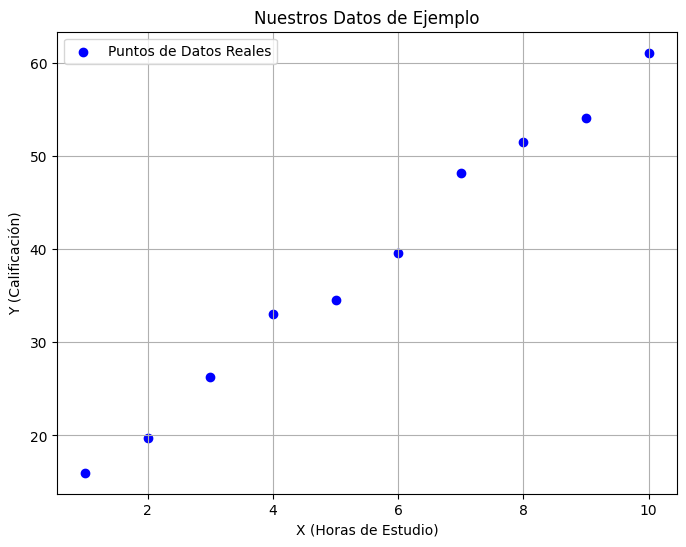

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Generar Datos de Ejemplo ---
# Queremos ver una relación lineal, así que creamos puntos que más o menos siguen una línea.
# Añadimos un poco de "ruido" para que no sean perfectamente en línea, como en la vida real.
np.random.seed(42) # Para que los resultados sean reproducibles

# Datos de entrada (X) - por ejemplo, horas de estudio
X_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Datos de salida (Y) - por ejemplo, calificación obtenida, con algo de ruido
# Imaginamos que la relación "real" es 5*x + 10, y le añadimos pequeñas variaciones
y_data = 5 * X_data + 10 + np.random.normal(0, 2, size=len(X_data))

print("Datos de entrada (X):", X_data)
print("Datos de salida (y):", y_data)

# Visualicemos estos puntos
plt.figure(figsize=(8, 6))
plt.scatter(X_data, y_data, color='blue', label='Puntos de Datos Reales')
plt.title('Nuestros Datos de Ejemplo')
plt.xlabel('X (Horas de Estudio)')
plt.ylabel('Y (Calificación)')
plt.grid(True)
plt.legend()
plt.show()

### Calculando los Componentes para las Fórmulas

Ahora, vamos a calcular cada una de las sumas que necesitamos para nuestras fórmulas de m y b.

In [7]:
# --- 2. Calcular los componentes de las fórmulas ---
n = len(X_data) # Número de puntos de datos

sum_x = np.sum(X_data)
sum_y = np.sum(y_data)
sum_xy = np.sum(X_data * y_data) # Suma de (x * y) para cada punto
sum_x_squared = np.sum(X_data**2) # Suma de (x al cuadrado) para cada punto

print(f"N (Número de puntos): {n}")
print(f"Sumatorio de X: {sum_x}")
print(f"Sumatorio de Y: {sum_y}")
print(f"Sumatorio de (X * Y): {sum_xy}")
print(f"Sumatorio de (X^2): {sum_x_squared}")

N (Número de puntos): 10
Sumatorio de X: 55
Sumatorio de Y: 383.96122223397515
Sumatorio de (X * Y): 2523.148160959023
Sumatorio de (X^2): 385


### Aplicando las Fórmulas para Obtener m y b

Con todos los componentes listos, podemos aplicar las fórmulas directamente para encontrar nuestra pendiente (m) y nuestro intercepto (b).

In [8]:
# --- 3. Calcular la pendiente (m) y el intercepto (b) ---

# Calculamos el denominador, y es importante verificar que no sea cero.
# Si fuera cero, significaría que todos nuestros valores de X son idénticos,
# lo cual no nos permite definir una pendiente única (sería una línea vertical).
denominator = n * sum_x_squared - sum_x**2

if denominator == 0:
    # Esto ocurre si todos los valores de X son iguales.
    # En este caso, la "mejor" línea horizontal sería la media de Y.
    m = 0.0
    b = np.mean(y_data)
    print("¡Advertencia! Todos los valores de X son iguales. Se asumió pendiente 0.")
else:
    m = (n * sum_xy - sum_x * sum_y) / denominator
    b = (sum_y - m * sum_x) / n

print(f"\nPendiente (m): {m:.4f}")
print(f"Intercepto (b): {b:.4f}")


Pendiente (m): 4.9862
Intercepto (b): 10.9720


Ahora que tenemos los valores de m y b, podemos dibujar nuestra línea de regresión sobre los datos originales para ver cómo de bien se ajusta.

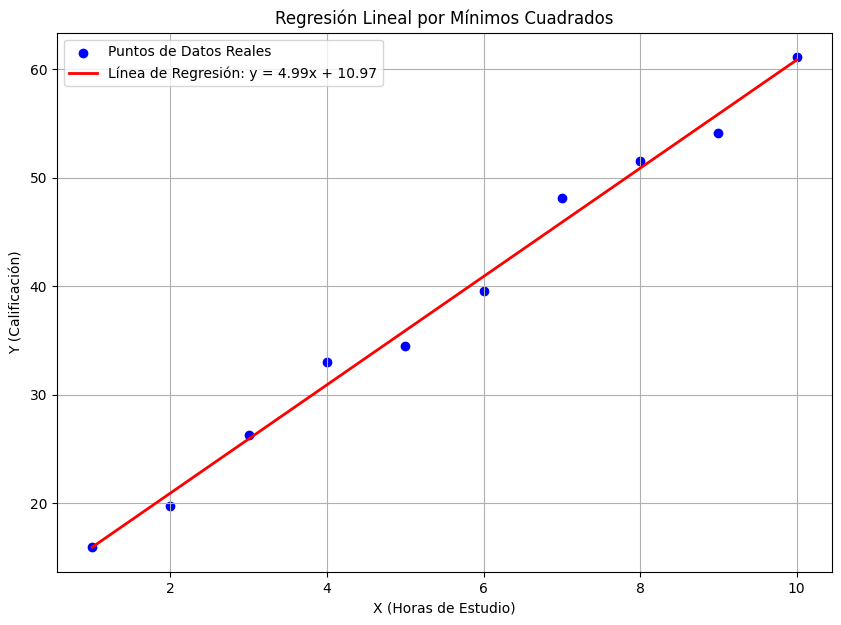

In [9]:
# --- 4. Realizar Predicciones y Visualizar la Línea ---

# Usamos la ecuación y = mx + b para predecir los valores de y
# para cada uno de nuestros puntos X_data.
predicted_y = m * X_data + b

plt.figure(figsize=(10, 7))
plt.scatter(X_data, y_data, color='blue', label='Puntos de Datos Reales')
plt.plot(X_data, predicted_y, color='red', linewidth=2, label=f'Línea de Regresión: y = {m:.2f}x + {b:.2f}')
plt.title('Regresión Lineal por Mínimos Cuadrados')
plt.xlabel('X (Horas de Estudio)')
plt.ylabel('Y (Calificación)')
plt.grid(True)
plt.legend()
plt.show()

### Usando Nuestro Modelo Lineal para Predicciones

Una vez que tenemos nuestro modelo (nuestros valores de m y b), podemos usarlo para predecir valores de y para cualquier nuevo valor de x, incluso si no estaba en nuestros datos originales.

Si estudias 7.5 horas, la calificación predicha es: 48.37


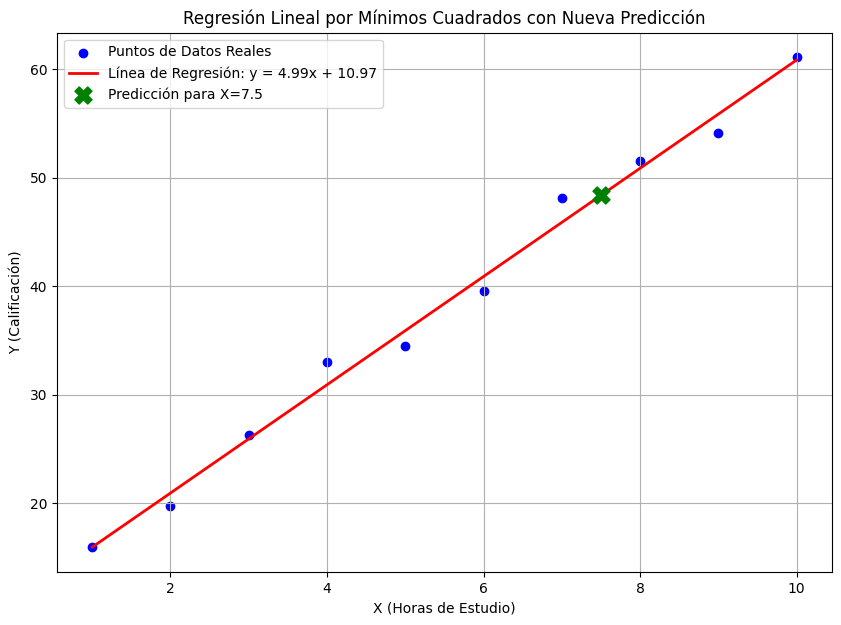

In [10]:
# --- 5. Hacer Predicciones con el Modelo Entrenado ---

# Probemos con un nuevo valor de X, por ejemplo, 7.5 horas de estudio
new_X_value = 7.5
predicted_new_y = m * new_X_value + b

print(f"Si estudias {new_X_value} horas, la calificación predicha es: {predicted_new_y:.2f}")

# Añadimos la nueva predicción a la gráfica
plt.figure(figsize=(10, 7))
plt.scatter(X_data, y_data, color='blue', label='Puntos de Datos Reales')
plt.plot(X_data, predicted_y, color='red', linewidth=2, label=f'Línea de Regresión: y = {m:.2f}x + {b:.2f}')
plt.scatter(new_X_value, predicted_new_y, color='green', marker='X', s=150, zorder=5, label=f'Predicción para X={new_X_value}')
plt.title('Regresión Lineal por Mínimos Cuadrados con Nueva Predicción')
plt.xlabel('X (Horas de Estudio)')
plt.ylabel('Y (Calificación)')
plt.grid(True)
plt.legend()
plt.show()

¿Cómo se Relaciona Esto con el RMI?

En el contexto de nuestro RMI:

    El Nivel 0 (nuestro modelo maestro) es un modelo lineal que aprende la relación entre el valor del dato (nuestra X) y su posición aproximada en el array (nuestra Y).
    Cada uno de los modelos de Nivel 1 es también un pequeño modelo lineal, pero entrenado solo para una pequeña porción de los datos. Estos modelos aprenden la relación entre el valor del dato (su X) y su posición más precisa dentro de esa porción (su Y).

La belleza de usar modelos lineales en el RMI es que, una vez que calculamos m y b, solo necesitamos almacenar estos dos números para cada modelo. Esto es increíblemente compacto en memoria comparado con almacenar todos los datos o muchos punteros, como lo harían otras estructuras de índice.

Ajuste de Modelos para Minimizar el Error de Posición

En el RMI, no solo queremos predecir una posición, queremos que esa predicción sea lo más cercana posible al índice real. El método de mínimos cuadrados ya hace esto al minimizar la suma de los errores al cuadrado.

El "ajuste" para minimizar el error de posición en un RMI se logra principalmente por:

    Entrenamiento en Datos Ordenados: La regresión lineal funciona mejor cuando la relación es lineal. En un array ordenado, la relación entre el valor y su índice tiende a ser lineal (o al menos localmente lineal), lo que hace que la regresión lineal sea una buena elección.
    Múltiples Modelos (Nivel 1 y más): Al dividir el problema en sub-problemas más pequeños (los segmentos del Nivel 1), cada modelo de regresión lineal solo tiene que ajustarse a una porción más pequeña y posiblemente más lineal de los datos. Esto reduce el error general.
    Refinamiento Local (Búsqueda Lineal/Binaria): Incluso la mejor línea tendrá errores. La fase de "búsqueda local" alrededor de la predicción final es crucial para compensar estos errores y encontrar el índice exacto. Es el "ajuste fino" final

Conclusión

Hemos explorado a fondo el corazón matemático de los Índices de Modelo Recursivo: la regresión lineal por mínimos cuadrados. Ahora sabemos cómo se calculan la pendiente y el intercepto de la línea de mejor ajuste, y cómo esta línea nos permite hacer predicciones.

Este entendimiento es fundamental para apreciar la eficiencia y el ingenio de los RMI. En los próximos cuadernos, continuaremos construyendo los demás componentes de nuestro proyecto y, finalmente, realizaremos comparativas para ver el poder de estas estructuras en acción.